<a href="https://colab.research.google.com/github/MaxiAragon/Actividad1/blob/main/Actividad_1_Berlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 1**
##**Maximiliano Aragón Fragoso**
##**A01702063**

1. Crear un nuevo repositorio nuevo con el nombre: Actividad 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Agregar el archivo: Listing.csv.gz de México ingresar a: http://insideairbnb.com/get-the-data/

In [2]:
df = pd.read_csv('listings_berlin.csv.gz')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,652868795892201022,https://www.airbnb.com/rooms/652868795892201022,20220915162225,2022-09-15,city scrape,Kleine Auszeit? Oder Business-Trip? Alles mögl...,"Hallo ihr Lieben,<br /><br />kommt und verbrin...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,21708794,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1,29077694,https://www.airbnb.com/rooms/29077694,20220915162225,2022-09-16,previous scrape,Wohnung im Grünen nah an der Metropole,Wohnung befindet sich im Souterrain eines Einf...,"We live in a green, quite and save area with ...",https://a0.muscache.com/pictures/e2642fca-3833...,219116245,...,4.93,4.52,4.66,NaN,f,1,1,0,0,0.63
2,27080612,https://www.airbnb.com/rooms/27080612,20220915162225,2022-09-15,city scrape,Apartment with Living/Sleeping Room & own Kitchen,The well-equipped 30 m² large Apartment is loc...,The Apartment is located in a quiet area close...,https://a0.muscache.com/pictures/c08faa7a-40c0...,130216168,...,4.99,4.79,4.92,NaN,t,2,2,0,0,2.54
3,665648367391379321,https://www.airbnb.com/rooms/665648367391379321,20220915162225,2022-09-15,city scrape,Schöne Eigentumswohnung mit Balkon,Wenn du in dieser zentral gelegenen Unterkunft...,NaN,https://a0.muscache.com/pictures/55e91f59-55dd...,106965422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN
4,3176,https://www.airbnb.com/rooms/3176,20220915162225,2022-09-15,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,...,4.69,4.92,4.63,NaN,f,1,1,0,0,0.91


In [3]:
# Filtrar por columnas
df1 = df.loc[:, ['number_of_reviews', 'host_acceptance_rate', 'price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'room_type']]
df1.head()

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,0,100%,$88.00,6,NaN,NaN,NaN,Entire home/apt
1,29,100%,$36.00,6,4.79,4.52,4.93,Entire home/apt
2,126,100%,$60.00,163,4.98,4.98,4.99,Entire home/apt
3,0,100%,$120.00,257,NaN,NaN,NaN,Entire home/apt
4,147,0%,$150.00,350,4.63,4.53,4.69,Entire home/apt


In [4]:
df1["host_acceptance_rate"] = df1["host_acceptance_rate"].str.replace("%","")
df1["price"] = df1["price"].str.replace("$","")
df1["price"] = df1["price"].str.replace(",","")
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,0,100,88.00,6,NaN,NaN,NaN,Entire home/apt
1,29,100,36.00,6,4.79,4.52,4.93,Entire home/apt
2,126,100,60.00,163,4.98,4.98,4.99,Entire home/apt
3,0,100,120.00,257,NaN,NaN,NaN,Entire home/apt
4,147,0,150.00,350,4.63,4.53,4.69,Entire home/apt


3. Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            16680 non-null  int64  
 1   host_acceptance_rate         9196 non-null   object 
 2   price                        16680 non-null  object 
 3   availability_365             16680 non-null  int64  
 4   review_scores_rating         13812 non-null  float64
 5   review_scores_cleanliness    13563 non-null  float64
 6   review_scores_communication  13561 non-null  float64
 7   room_type                    16680 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.0+ MB


In [6]:
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].astype('float64')
df1['price'] = df1['price'].astype('float64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            16680 non-null  int64  
 1   host_acceptance_rate         9196 non-null   float64
 2   price                        16680 non-null  float64
 3   availability_365             16680 non-null  int64  
 4   review_scores_rating         13812 non-null  float64
 5   review_scores_cleanliness    13563 non-null  float64
 6   review_scores_communication  13561 non-null  float64
 7   room_type                    16680 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
df1['review_scores_rating'].fillna(df1['review_scores_rating'].mean(), inplace = True)
df1['review_scores_cleanliness'].fillna(df1['review_scores_cleanliness'].mean(), inplace = True)
df1['host_acceptance_rate'].fillna(df1['host_acceptance_rate'].mean(), inplace = True)
df1['review_scores_communication'].fillna(df1['review_scores_communication'].mean(), inplace = True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            16680 non-null  int64  
 1   host_acceptance_rate         16680 non-null  float64
 2   price                        16680 non-null  float64
 3   availability_365             16680 non-null  int64  
 4   review_scores_rating         16680 non-null  float64
 5   review_scores_cleanliness    16680 non-null  float64
 6   review_scores_communication  16680 non-null  float64
 7   room_type                    16680 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
y = df1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido number_of_reviews               53.500000
host_acceptance_rate           122.738365
price                          215.000000
availability_365               417.500000
review_scores_rating             5.525206
review_scores_cleanliness        5.500000
review_scores_communication      5.263283
dtype: float64
Limite inferior permitido number_of_reviews              -30.500000
host_acceptance_rate            51.436059
price                          -65.000000
availability_365              -250.500000
review_scores_rating             4.124656
review_scores_cleanliness        4.060000
review_scores_communication      4.561196
dtype: float64


In [10]:
df2 = df1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,0.0,100.000000,88.0,6,4.649862,4.648379,4.824478,NaN
1,29.0,100.000000,36.0,6,4.790000,4.520000,4.930000,NaN
2,NaN,100.000000,60.0,163,4.980000,4.980000,4.990000,NaN
3,0.0,100.000000,120.0,257,4.649862,4.648379,4.824478,NaN
4,NaN,NaN,150.0,350,4.630000,4.530000,4.690000,NaN
...,...,...,...,...,...,...,...,...
16675,0.0,NaN,99.0,351,4.649862,4.648379,4.824478,NaN
16676,23.0,86.000000,160.0,148,5.000000,4.960000,5.000000,NaN
16677,0.0,NaN,195.0,336,4.649862,4.648379,4.824478,NaN
16678,0.0,78.174424,60.0,288,4.649862,4.648379,4.824478,NaN


In [11]:
df3 = df2.copy()
df3 = df3.fillna(round(df2.mean(),1))
df3

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,0.0,100.000000,88.0,6,4.649862,4.648379,4.824478,NaN
1,29.0,100.000000,36.0,6,4.790000,4.520000,4.930000,NaN
2,8.9,100.000000,60.0,163,4.980000,4.980000,4.990000,NaN
3,0.0,100.000000,120.0,257,4.649862,4.648379,4.824478,NaN
4,8.9,84.200000,150.0,350,4.630000,4.530000,4.690000,NaN
...,...,...,...,...,...,...,...,...
16675,0.0,84.200000,99.0,351,4.649862,4.648379,4.824478,NaN
16676,23.0,86.000000,160.0,148,5.000000,4.960000,5.000000,NaN
16677,0.0,84.200000,195.0,336,4.649862,4.648379,4.824478,NaN
16678,0.0,78.174424,60.0,288,4.649862,4.648379,4.824478,NaN


In [12]:
df3['room_type'] = df1['room_type']
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16680 entries, 0 to 16679
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            16680 non-null  float64
 1   host_acceptance_rate         16680 non-null  float64
 2   price                        16680 non-null  float64
 3   availability_365             16680 non-null  int64  
 4   review_scores_rating         16680 non-null  float64
 5   review_scores_cleanliness    16680 non-null  float64
 6   review_scores_communication  16680 non-null  float64
 7   room_type                    16680 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [13]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [14]:
entire_home = df3[df3['room_type'] == 'Entire home/apt']
private_room = df3[df3['room_type'] == 'Private room']
hotel_room = df3[df3['room_type'] == 'Hotel room']
shared_room = df3[df3['room_type'] == 'Shared room']

4. Analizar la correlación que existe en cada tipo de habitación respecto a las variables siguientes, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

###**Correlaciones para "entire home"**

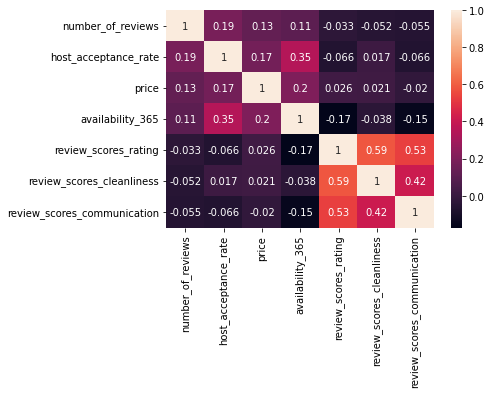

In [15]:
from sklearn.linear_model import LinearRegression
sns.heatmap(entire_home.corr(), annot = True)

In [32]:
Vars_Indep_entire = entire_home[['host_acceptance_rate', 'price','availability_365']]
Var_Dep_entire = entire_home['number_of_reviews']

In [33]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X=Vars_Indep_entire, y=Var_Dep_entire)
model1.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'price', 'availability_365'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.16430746, 0.02442565, 0.00295426]),
 '_residues': 1174197.5277232341,
 'rank_': 3,
 'singular_': array([12748.72178725,  4025.49881664,  1015.37968255]),
 'intercept_': -7.199547059957531}

In [34]:
model1.score(Vars_Indep_entire, Var_Dep_entire)

0.04555182069803254

###**Correlaciones para "private room"**

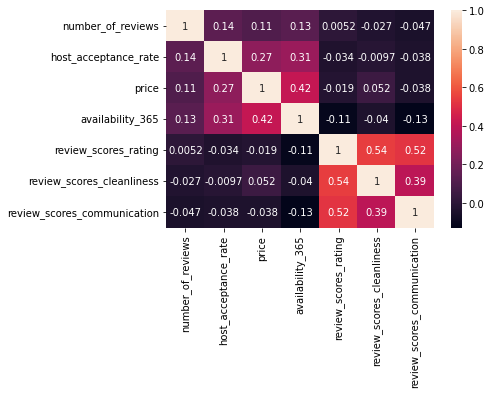

In [19]:
sns.heatmap(private_room.corr(), annot = True)

In [35]:
Vars_Indep_private = private_room[['host_acceptance_rate', 'price','availability_365']]
Var_Dep_private = private_room['number_of_reviews']

In [36]:
model2 = LinearRegression()
model2.fit(X = Vars_Indep_private, y = Var_Dep_private)
model2.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'price', 'availability_365'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.12104258, 0.01519492, 0.00804988]),
 '_residues': 690447.7837607063,
 'rank_': 3,
 'singular_': array([8615.66430713, 2211.15198241,  700.75439574]),
 'intercept_': -2.9071411333762676}

In [37]:
model2.score(Vars_Indep_private, Var_Dep_private)

0.030998105990950875

###**Correlaciones para "hotel room"**

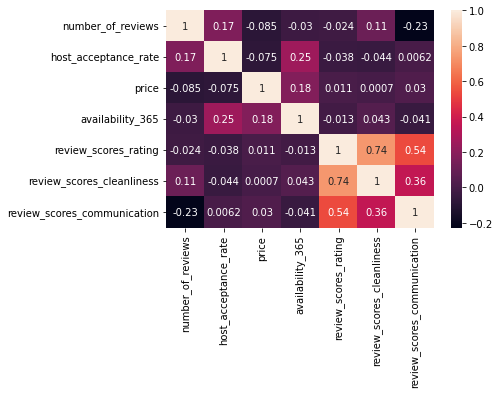

In [23]:
sns.heatmap(hotel_room.corr(), annot = True)

In [40]:
Vars_Indep_hotel = hotel_room[['host_acceptance_rate', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep_hotel = hotel_room['number_of_reviews']

In [41]:
model3 = LinearRegression()
model3.fit(X = Vars_Indep_hotel, y = Var_Dep_hotel)
model3.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([  0.4141062 ,  15.74917546, -29.60363503]),
 '_residues': 19031.11662644823,
 'rank_': 3,
 'singular_': array([63.25466732,  2.2625057 ,  1.36928391]),
 'intercept_': 37.70419247307413}

In [42]:
model3.score(Vars_Indep_hotel, Var_Dep_hotel)

0.1251865219348116

###**Correlaciones para "shared room"**

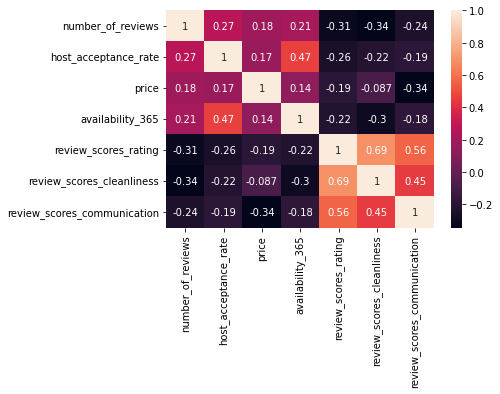

In [43]:
sns.heatmap(shared_room.corr(), annot = True)

In [44]:
Vars_Indep_shared = shared_room[['host_acceptance_rate', 'review_scores_rating','review_scores_cleanliness']]
Var_Dep_shared = shared_room['number_of_reviews']

In [45]:
model4 = LinearRegression()
model4.fit(X = Vars_Indep_shared, y = Var_Dep_shared)
model4.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate', 'review_scores_rating',
        'review_scores_cleanliness'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([  0.2572108 ,  -6.48321314, -14.27890032]),
 '_residues': 26683.88942611735,
 'rank_': 3,
 'singular_': array([131.4990998 ,   3.59616185,   1.57760128]),
 'intercept_': 84.95850891953869}

In [46]:
model4.score(Vars_Indep_shared, Var_Dep_shared)

0.16256827474357138

5. Crear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento, utilizando la variable con con mayor correlación.

Para entire home, utilizamos la variable *host_acceptance_rate, price, availability_365*

$y = 0.16x_1 + 0.024x_2 + 0.003x_3 - 7.2$

Para private room, utilizamos la variable *host_acceptance_rate, price, availability_365*

$y = 0.121x_1 + 0.015x_2 + 0.008x_3 - 2.9$

Para hotel room, utilizamos la variable *host_acceptance_rate, review_scores_cleanliness, review_scores_communication*

$y = 0.414x_1 + 15.75x_2 - 29.603x_3 + 37.7$

Para shared room, utilizamos la variable *host_acceptance_rate, review_scores_rating, review_scores_cleanliness*

$y = 0.257x_1 - 6.483x_2 - 14.279x_3 + 84.96$

6. Realizar una tabla de todos los coeficientes de determinación y correlación obtenidos para cada tipo de habitación.

In [47]:
df5 = pd.DataFrame(columns = ['Room Type', 'Coef Deter', 'Coef Corr'])
df5['Room Type'] = df['room_type'].unique()
model_entire = LinearRegression()
model_entire.fit(X = entire_home[['host_acceptance_rate']], y = entire_home['number_of_reviews'])
deter_entire = model_entire.score(X = entire_home[['host_acceptance_rate']], y = entire_home['number_of_reviews'])
corr_entire = np.sqrt(deter_entire)

model_private = LinearRegression()
model_private.fit(X = private_room[['host_acceptance_rate']], y = private_room['number_of_reviews'])
deter_private = model_private.score(X = private_room[['host_acceptance_rate']], y = private_room['number_of_reviews'])
corr_private = np.sqrt(deter_private)
                      
model_hotel = LinearRegression()
model_hotel.fit(X = hotel_room[['review_scores_communication']], y = hotel_room['number_of_reviews'])
deter_hotel = model_hotel.score(X = hotel_room[['review_scores_communication']], y = hotel_room['number_of_reviews'])
corr_hotel = np.sqrt(deter_hotel)

model_shared = LinearRegression()
model_shared.fit(X = shared_room[['host_acceptance_rate']], y = shared_room['number_of_reviews'])
deter_shared = model_shared.score(X = shared_room[['host_acceptance_rate']], y = shared_room['number_of_reviews'])
corr_shared = np.sqrt(deter_shared)

df5['Coef Deter'] = [deter_entire, deter_private, deter_hotel, deter_shared]
df5['Coef Corr'] = [corr_entire, corr_private, corr_hotel, corr_shared]

df5

,Room Type,Coef Deter,Coef Corr
0,Entire home/apt,0.035668,0.188859
1,Private room,0.020792,0.144194
2,Shared room,0.051856,0.227718
3,Hotel room,0.070809,0.266100
